In [2]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.kymo_class import *
from scipy.signal import find_peaks
import os
from pathlib import Path
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from glob import glob
from tqdm import tqdm
from tifffile import imwrite
import seaborn as sns
%matplotlib widget
%load_ext autoreload
%autoreload 2

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
path = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\HFSP_symbiotic-networks\Article_TravellingWave\rebuttal\Material4Rebuttal\IRMDataNotebook\RebutalddPCR_VK_V3.xlsx"

In [4]:
tab = pd.read_excel(path,sheet_name="simplified")
tab = tab[tab['Days']>0]

In [5]:
tab['ratio']=tab['IRM']/tab['ERM']
tab['Days']=tab['Days'].astype(int)

In [6]:
plt.style.use('presentation.mplstyle')
path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'


2024-05-20 14:05:04,750-[INFO]- fontTools.subset:2815 -> maxp pruned
2024-05-20 14:05:04,771-[INFO]- fontTools.subset:2815 -> cmap pruned
2024-05-20 14:05:04,772-[INFO]- fontTools.subset:2799 -> kern dropped
2024-05-20 14:05:04,773-[INFO]- fontTools.subset:2815 -> post pruned
2024-05-20 14:05:04,774-[INFO]- fontTools.subset:2799 -> FFTM dropped
2024-05-20 14:05:04,785-[INFO]- fontTools.subset:2815 -> GPOS pruned
2024-05-20 14:05:04,795-[INFO]- fontTools.subset:2815 -> GSUB pruned
2024-05-20 14:05:04,797-[INFO]- fontTools.subset:2815 -> name pruned
2024-05-20 14:05:04,816-[INFO]- fontTools.subset:2815 -> glyf pruned
2024-05-20 14:05:04,818-[INFO]- fontTools.subset:2855 -> Added gid0 to subset
2024-05-20 14:05:04,820-[INFO]- fontTools.subset:2863 -> Added first four glyphs to subset
2024-05-20 14:05:04,821-[INFO]- fontTools.subset:2867 -> Closing glyph list over 'GSUB': 6 glyphs before
2024-05-20 14:05:04,822-[INFO]- fontTools.subset:446 -> Glyph names: ['.notdef', '.null', 'm', 'nonmark

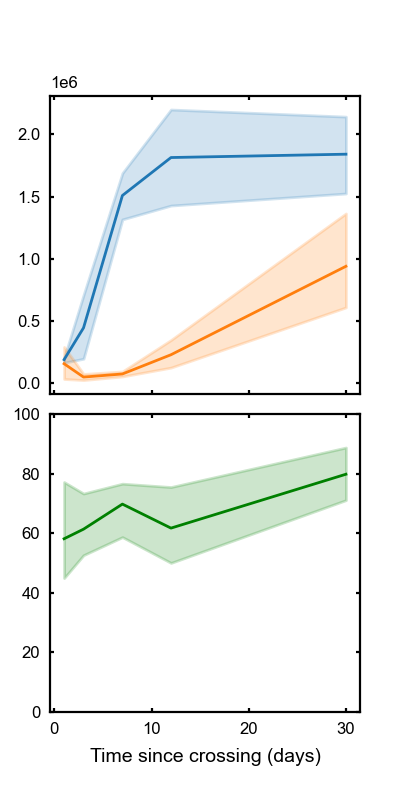

In [12]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(2, 4), sharex=True)
sns.lineplot(tab,x="Days",y="ERM",ax=ax)
sns.lineplot(tab,x="Days",y="IRM",ax=ax)

sns.lineplot(tab,x="Days",y="Colonization",ax=ax2,color="green")
ax2.set_ylim(0,100)
# sns.stripplot(tab,x="Days",y="ERM",size = 3)

ax2.set_xlabel("Time since crossing (days)")
ax.set_ylabel("hyphal length ($\mu m$)",labelpad = 10)
ax2.set_ylabel("% colonization")
fig.subplots_adjust(hspace=0.070)  # Adjust the space as needed

plt.savefig(os.path.join(path_figure,'ERM.pdf'), transparent=True, bbox_inches='tight')

Text(0, 0.5, 'IRM hyphal length ($\\mu m$)')

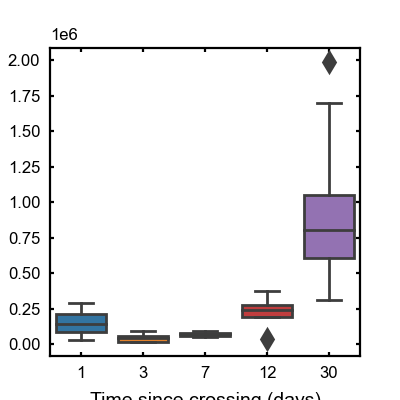

In [7]:
fig,ax =plt.subplots(figsize = (2.,2))
sns.boxplot(tab,x="Days",y="IRM")
ax.set_xlabel("Time since crossing (days)")
ax.set_ylabel("IRM hyphal length ($\mu m$)")
# plt.savefig(os.path.join(path_figure,'IRM.pdf'), transparent=True, bbox_inches='tight')

Text(0, 0.5, 'Colonization (%)')

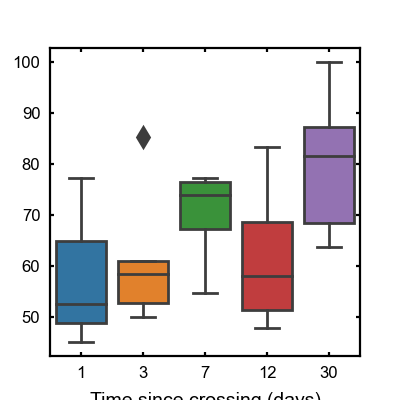

In [8]:
fig,ax =plt.subplots(figsize = (2.,2))
sns.boxplot(tab,x="Days",y="Colonization")
ax.set_xlabel("Time since crossing (days)")
ax.set_ylabel("Colonization (%)")
# plt.savefig(os.path.join(path_figure,'IRM.pdf'), transparent=True, bbox_inches='tight')

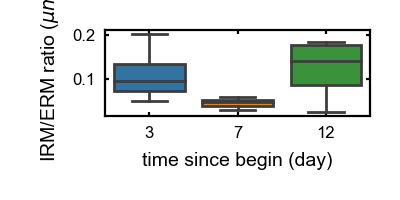

In [9]:
fig,ax =plt.subplots(figsize = (2.,1))
select = tab[tab['Days'].between(2,25)]
sns.boxplot(select,x="Days",y="ratio")
ax.set_xlabel("time since begin (day)")
ax.set_ylabel("IRM/ERM ratio ($\mu m$)")
plt.tight_layout()